# 初识卷积神经网络——MNIST
## 1.课前碎碎念
MNIST--手写数字识别被很多人称作是深度学习的“Hello World！”
MNIST确实是一个简洁又简单的数据集，也是第一个深度学习算法解决的实际问题，
MNIST数据集很小，很适合教学实用，同时资源占用较少，没有GPU也能够进行训练。

我比较不喜欢“Hello World！”这个比喻，想要完全掌握MNIST，所需要的知识远不是敲进去一行代码就可以的。
实际上GAN最早被提出时，也是在MNIST数据集上做的验证。

在我有限的知识背景下，中心损失函数也是使用MNIST进行验证的。

——江小河  课前碎碎念

## 2.使用Keras编写Lenet
首先我们导入算法框架工具包

In [1]:
import tensorflow.keras as K
# import keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

我这里首先使用tensorflow后端的Keras进行讲解，注意这里我使用tensorflow.keras来引入keras。这是因为至少从1.9.0版本以后，tensorflow已经讲keras默认继承安装在了tensorflow包中。很多keras的教程会要求分别安装tensorflow和keras，通过import keras来导入。实际上没有任何区别（目前没有发现任何区别）

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def check_dimension(data, data_name):
    assert type(data) is np.ndarray
    print(data_name+"`s shape is " + str(data.shape))

check_dimension(x_train, "x_train")
check_dimension(y_train, "y_train")
check_dimension(x_test, "x_test")
check_dimension(y_test, "y_test")

x_train`s shape is (60000, 28, 28)
y_train`s shape is (60000,)
x_test`s shape is (10000, 28, 28)
y_test`s shape is (10000,)


Num 43786 is an image for 9.
Num 9839 is an image for 2.


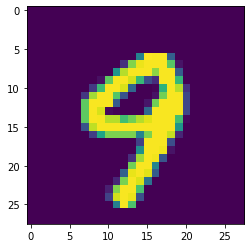

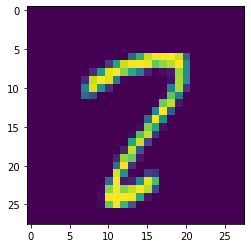

In [4]:
def check_example(x, y, number=None):
    if number == None:
        number = np.random.randint(x.shape[0])
    print("Num {} is an image for {}.".format(number, y[number]))
    plt.figure()
    plt.imshow(x[number])

check_example(x_train, y_train)
check_example(x_test, y_test)

In [5]:
from tensorflow.keras.backend import one_hot
y_train = K.backend.eval(one_hot(y_train, 10))
y_test= K.backend.eval(one_hot(y_test, 10))

In [6]:
check_dimension(x_train, "x_train")
check_dimension(y_train, "y_train")
check_dimension(x_test, "x_test")
check_dimension(y_test, "y_test")

x_train`s shape is (60000, 28, 28)
y_train`s shape is (60000, 10)
x_test`s shape is (10000, 28, 28)
y_test`s shape is (10000, 10)


In [7]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


导入Lenet模型图，作为创建网络的参考

![Lenet](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1559582032465&di=4a4061c5062506fc7a4a4d605d2e2443&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2F4lN1XOZshffJhuEYgHmB6aNaASYT9xjqANHsYIBsibQdynicOGUkqgNHBMbX0LHLhCiaswHvE0IltaZFIPWNJia9Yw%2F640%3Fwx_fmt%3Dpng)

In [8]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, kernel_size=(5, 5), padding="valid", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


查看网络摘要，和Lenet进行对比

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

编译模型（设置优化器，优化参数）

## 3.训练模型

In [10]:
adam = K.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

设置mini_batch

In [11]:
def gen_mini_batch():
    pass
#keras 的训练函数可以进行batchsize的设置

In [12]:
x_train = K.backend.eval(K.backend.expand_dims(x_train, axis=-1))
x_test = K.backend.eval(K.backend.expand_dims(x_test, axis=-1))

训练模型

In [13]:
history_lenet_0 = model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 6.7444 - acc: 0.5472
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 3.9644 - acc: 0.7240
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 2.3455 - acc: 0.8211
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.7412 - acc: 0.8659
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.6989 - acc: 0.8740
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 1.6715 - acc: 0.8796
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 1.6521 - acc: 0.8840
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 1.6383 - acc: 0.8876
Epoch 9/10
60000/60000 [==============================] - 4s 75us/sample - loss: 1.6280 - acc: 0.8902
Epoch 10/10
60000/60000 [========

## 4.测试模型

In [14]:
#使用模型在测试集上进行预测，生成结果为numpy.ndarray, shape=(10000, 10)
y_test_predict = model.predict(x_test)
#使用np.argmax可以求得预测样本标签，e.g. 1,2,3,...9
y_label_pre = np.argmax(y_test_predict, axis=-1)
#求测试准确度
test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
test_acc

0.8835

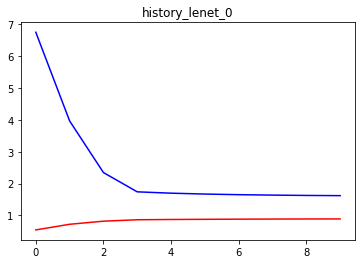

In [15]:
history_lenet_0.history
plt.title("history_lenet_0")
plt.plot(history_lenet_0.history['acc'], c='r')
plt.plot(history_lenet_0.history['loss'], c='b')

## 5.TODO List

### 1.修改网络参数进行测试，争取得到更好的结果。
    如：网络深度，卷积核个数，卷积核尺寸，池化尺寸，全连接隐藏层节点数，归一化操作，batchsize，学习率，正则化参数……
    （挑学会了的看懂了的改……）
### 2.在修改网络之前，手推一遍自己的网络输出尺寸，参数量大小，使用summary函数进行验证。
### 3.（选做）扩充版QMNIST数据集
    github上推出了扩充版的MNIST数据集，下载并进行测试。
    传送门：https://github.com/facebookresearch/qmnist
    （可能需要GPU）

## 参考VGG16构架缩减了卷积核数量，添加BacthNorm、Dropout层、GAP层        替换FC

In [16]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(GlobalAveragePooling2D()) 
model1.add(Dropout(0.25))
model1.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation="softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 14, 14, 32)        128       
__________

In [18]:
adam = K.optimizers.Adam(lr=0.001, decay=1e-5, epsilon=1e-08)
model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history_lenet_0 = model1.fit(x_train, y_train, batch_size=2048, epochs=50, shuffle=True)

Epoch 1/50
60000/60000 [==============================] - 7s 111us/sample - loss: 2.1096 - acc: 0.7129
Epoch 2/50
60000/60000 [==============================] - 4s 69us/sample - loss: 1.0726 - acc: 0.9582
Epoch 3/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.7425 - acc: 0.9786
Epoch 4/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5331 - acc: 0.9866
Epoch 5/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3977 - acc: 0.9906
Epoch 6/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3100 - acc: 0.9926
Epoch 7/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2491 - acc: 0.9944
Epoch 8/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2077 - acc: 0.9958
Epoch 9/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1787 - acc: 0.9974
Epoch 10/50
60000/60000 [==============================] - 4s 68us/sample - loss:

In [19]:
y_test_predict = model1.predict(x_test)
y_label_pre = np.argmax(y_test_predict, axis=-1)
test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
test_acc

0.9951

## Q2:
|Layer|Output Shape| Parm|
|---|---|---|
|CONV1-1| `28 * 28 * 16`| `(3*3+1) * 16`|
|CONV1-2| `28 * 28 * 16`| `(3*3*16+1) * 16`|
|MAX POOL1| `14 * 14 * 16`| 0 |
|CONV2-1| `14 * 14 * 32`| `(3*3*16+1) * 32`|
|CONV2-2| `14 * 14 * 32`| `(3*3*32+1) * 32`|
|MAX POOL2| `7 * 7 * 32`| 0 |
|CONV2-1| `7 * 7 * 64`| `(3*3*32+1) * 64`|
|CONV2-2| `7 * 7 * 64`| `(3*3*64+1) * 64`|
|MAX POOL3| `7 * 7 * 32`| 0 |
|CONV3-1| `3 * 3 * 128`| `(3*3*64+1) * 128`|
|CONV3-2| `3 * 3 * 128`| `(3*3*128+1) * 128`|
|GAP| `1 * 128`| 0 |
|FC1|`1*64`|`(128+1) * 64`|
|FC2|`1*32`|`(64+1) * 32`|
|FC3|`1*10`|`(32+1) * 10`|

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=0)

In [21]:
from tensorflow.keras.callbacks import  ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor='val_acc',
                      patience=3,
                      verbose=1,
                      factor=0.7,
                      min_lr=0.00001)

In [22]:
gen = ImageDataGenerator(rotation_range = 10,
                        width_shift_range = 0.2,
                        height_shift_range = 0.2,
                        shear_range = 0.3,
                        zoom_range = 0.2,
                        data_format = 'channels_last',)
gen.fit(x_train)
train_generator = gen.flow(x_train, y_train, batch_size=2048)
history = model1.fit(train_generator,
                    epochs = 80,
                    validation_data = (x_val, y_val),
                    callbacks=[lr])

Epoch 1/80
27/27 [==============================] - 11s 402ms/step - loss: 0.2075 - acc: 0.9591 - val_loss: 0.1387 - val_acc: 0.9762
Epoch 2/80
27/27 [==============================] - 9s 344ms/step - loss: 0.1287 - acc: 0.9793 - val_loss: 0.1199 - val_acc: 0.9807
Epoch 3/80
27/27 [==============================] - 10s 367ms/step - loss: 0.1165 - acc: 0.9832 - val_loss: 0.0833 - val_acc: 0.9890
Epoch 4/80
27/27 [==============================] - 10s 368ms/step - loss: 0.1036 - acc: 0.9857 - val_loss: 0.0763 - val_acc: 0.9912
Epoch 5/80
27/27 [==============================] - 10s 373ms/step - loss: 0.0954 - acc: 0.9873 - val_loss: 0.0661 - val_acc: 0.9922
Epoch 6/80
27/27 [==============================] - 10s 368ms/step - loss: 0.0946 - acc: 0.9874 - val_loss: 0.0765 - val_acc: 0.9910
Epoch 7/80
27/27 [==============================] - 10s 379ms/step - loss: 0.0886 - acc: 0.9888 - val_loss: 0.0691 - val_acc: 0.9913
Epoch 8/80
6000/6000 [==============================] - 0s 21us/sample

Epoch 36/80
27/27 [==============================] - 10s 367ms/step - loss: 0.0553 - acc: 0.9951 - val_loss: 0.0466 - val_acc: 0.9965
Epoch 37/80
6000/6000 [==============================] - 0s 22us/sample - loss: 0.0463 - acc: 0.9967

Epoch 00037: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
27/27 [==============================] - 10s 374ms/step - loss: 0.0561 - acc: 0.9950 - val_loss: 0.0465 - val_acc: 0.9967
Epoch 38/80
27/27 [==============================] - 10s 373ms/step - loss: 0.0564 - acc: 0.9950 - val_loss: 0.0466 - val_acc: 0.9967
Epoch 39/80
27/27 [==============================] - 10s 370ms/step - loss: 0.0560 - acc: 0.9947 - val_loss: 0.0470 - val_acc: 0.9967
Epoch 40/80
6000/6000 [==============================] - 0s 21us/sample - loss: 0.0464 - acc: 0.9963

Epoch 00040: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
27/27 [==============================] - 10s 375ms/step - loss: 0.0560 - acc: 0.9950 - val_loss: 0.0466 - val_acc

27/27 [==============================] - 11s 392ms/step - loss: 0.0523 - acc: 0.9956 - val_loss: 0.0463 - val_acc: 0.9965
Epoch 71/80
27/27 [==============================] - 11s 397ms/step - loss: 0.0525 - acc: 0.9954 - val_loss: 0.0462 - val_acc: 0.9965
Epoch 72/80
27/27 [==============================] - 10s 379ms/step - loss: 0.0553 - acc: 0.9950 - val_loss: 0.0461 - val_acc: 0.9965
Epoch 73/80
27/27 [==============================] - 10s 383ms/step - loss: 0.0535 - acc: 0.9954 - val_loss: 0.0462 - val_acc: 0.9965
Epoch 74/80
27/27 [==============================] - 10s 367ms/step - loss: 0.0538 - acc: 0.9953 - val_loss: 0.0461 - val_acc: 0.9965
Epoch 75/80
27/27 [==============================] - 10s 367ms/step - loss: 0.0543 - acc: 0.9951 - val_loss: 0.0461 - val_acc: 0.9963
Epoch 76/80
27/27 [==============================] - 10s 368ms/step - loss: 0.0522 - acc: 0.9956 - val_loss: 0.0461 - val_acc: 0.9963
Epoch 77/80
27/27 [==============================] - 10s 376ms/step - loss

In [23]:
y_test_predict = model1.predict(x_test)
y_label_pre = np.argmax(y_test_predict, axis=-1)
test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
test_acc

0.996

In [25]:
model1.save('D:/AI/workspace/CV/CS231N/model.h5')
new_model = K.models.load_model('D:/AI/workspace/CV/CS231N/model.h5')